# Feature selection
#### importing libraries and reading in data

In [57]:
import csv
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from graphviz import Source # for drawing decision tree
from IPython.display import SVG # for drawing decision tree
import numpy as np

motifNames = []
classes = []
rawData = []
# with open('data/raw.csv') as csvfile: 
#     readCSV = csv.reader(csvfile, delimiter=',') #for "raw.csv"
#     motifNames = next(readCSV)[1:-1] #remove left most column and 'class'
#     for row in readCSV:
#         rawData.append(row[1:-1])
#         classes.append(row[-1])

with open("data/yingnanData.csv", "r") as f:
    motifNames = next(f).split()[1:-1] #remove left most column and 'class'
    for line in f:
        row = line.split()
        rawData.append(row[1:-1])
        classes.append(row[-1])

print ("number of motif names:", len(motifNames)) 
print ("number of recorded classes:", len(classes))  
print ("Data Dimentions:", len(rawData),"rows,", len(rawData[0]), "cols")


number of motif names: 182
number of recorded classes: 145
Data Dimentions: 145 rows, 182 cols


#### Transpose data and convert to true / false for simpler code

In [58]:
# For "raw.csv"
# # convert data to T/F
# for row in range(len(rawData)):
#         for cell in range(len(rawData[row])):
#             if(rawData[row][cell] == '0.0'):
#                 rawData[row][cell] = False
#             elif(rawData[row][cell] == '1.0'):
#                 rawData[row][cell] = True
                
# # convert data to T/F
# for cell in range(len(classes)):
#     if(classes[cell] == '0.0'):
#         classes[cell] = False
#     elif(classes[cell] == '1.0'):
#         classes[cell] = True

# for "yingnanData.csv"
# convert data to T/F
for row in range(len(rawData)):
        for cell in range(len(rawData[row])):
            if(rawData[row][cell] == '0'):
                rawData[row][cell] = False
            elif(rawData[row][cell] == '1'):
                rawData[row][cell] = True
                
# convert data to T/F
for cell in range(len(classes)):
    if(classes[cell] == '0'):
        classes[cell] = False
    elif(classes[cell] == '1'):
        classes[cell] = True

    
# transpose data
tData = [list(i) for i in zip(*rawData)]
print ("Transposed Dimentions:", len(tData),"rows,", len(tData[0]), "cols")  

Transposed Dimentions: 182 rows, 145 cols


#### Count how many times each motif occurs in the positive and negative classes

In [59]:
posCounts = []
negCounts = []

for row in range(len(tData)):
    posCount = 0
    negCount = 0
    for col in range(len(tData[row])):
        if(tData[row][col] == True):
            if(classes[col] == True):
                posCount += 1 
            elif(classes[col] == False):
                negCount += 1
    posCounts.append(posCount)
    negCounts.append(negCount)
    
print("first:", posCounts[0], "pos,", negCounts[0], "neg")
print("last:", posCounts[-1], "pos,", negCounts[-1], "neg")
print("max pos: ", max(posCounts))
print("max neg: ", max(negCounts))

first: 1 pos, 14 neg
last: 1 pos, 8 neg
max pos:  12
max neg:  119


In [60]:
numMotifs = len(motifNames)
posCoOccur = [0 for x in range(numMotifs*numMotifs)]
negCoOccur = [0 for x in range(numMotifs*numMotifs)]
for primaryMotif in range(len(tData)):
    for col in range(len(tData[primaryMotif])):
        if(tData[primaryMotif][col]):
            for secondaryMotif in range(primaryMotif+1,numMotifs):
                if(tData[secondaryMotif][col]):
                    if(classes[col]):
                        posCoOccur[primaryMotif + secondaryMotif * numMotifs] += 1
                    else:
                        negCoOccur[primaryMotif + secondaryMotif * numMotifs] += 1


### plot co-occurances

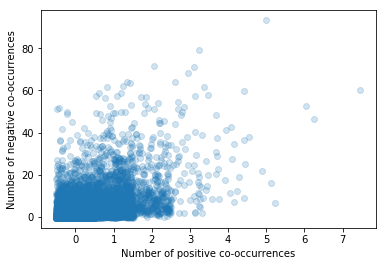

In [61]:
import random
# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)))
# plt.scatter(posCoOccur, negCoOccur, alpha=0.3)
plt.scatter(list(map(lambda x: x + random.random() -.5, posCoOccur)), list(map(lambda x: x + random.random() -.5, negCoOccur)), alpha=0.2)
plt.xlabel("Number of positive co-occurrences")
plt.ylabel("Number of negative co-occurrences")
plt.show()

#### create plots foreground and background counts

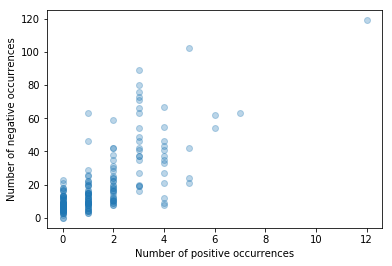

In [68]:
import random
# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)))
plt.scatter(posCounts, negCounts, alpha=0.3)
# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)), alpha=0.3)
plt.xlabel("Number of positive occurrences")
plt.ylabel("Number of negative occurrences")
plt.show()


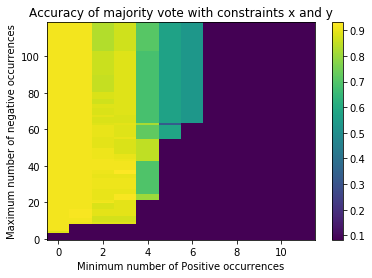

In [63]:
heatData = []
for maxNeg in range(max(negCounts)):
    heatDataRow = []
    for minPos in range(max(posCounts)):
        predictions = [0] * len(classes)
        
        for motif in range(len(posCounts)):
            if(posCounts[motif] > minPos and negCounts[motif] < maxNeg):
                for seq in range(len(classes)):
                    if(tData[motif][seq]):
                        predictions[seq] += 1.0
                    else:
                        predictions[seq] -= 1.0
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        for i in range(len(classes)):
            if(predictions[i] >= 0):
                if(classes[i]):
                    tp += 1.0
                else:
                    fp += 1.0
            else:
                if(classes[i]):
                    fn += 1.0
                else:
                    tn += 1.0
        heatDataRow.append((tp+tn)/(tp+tn+fp+fn))
    heatData.append(heatDataRow)
        
        
    
#         print("Sensitivity:",tp/(tp+fn))
#         print("Specificity:",tn/(tn+fp))
#         print("Accuracy:",(tp+tn)/(tp+tn+fp+fn))

# import matplotlib as mpl
# import numpy as np

img = plt.imshow(np.array(heatData),interpolation='nearest')

plt.colorbar() # make a color bar
plt.axis('auto')
plt.gca().invert_yaxis()
plt.title("Accuracy of majority vote with constraints x and y")
plt.xlabel("Minimum number of Positive occurrences")
plt.ylabel("Maximum number of negative occurrences")
plt.show()

#### create lasso scores

In [64]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=.001)
clf.fit(rawData, classes)
lassoScores = clf.coef_
print(len(lassoScores))

182


#### split data by if it has a positive and if it has a negative occurance

In [65]:
never = []
neverMotifNames = []
mixed = []
mixedMotifNames = []
right = []
rightMotifNames = []
bottom = []
bottomMotifNames = []
ratio = []
ratioMotifNames = []
lasso = []
lassoMotifNames = []
welchList = []
welchListMotifNames = []
for row in range(len(posCounts)):
    if negCounts[row] == 0 and posCounts[row] == 0:
        never.append(tData[row])
        neverMotifNames.append(motifNames[row])
    else:
        if posCounts[row] >= max(posCounts) - 1:
            right.append(tData[row])
            rightMotifNames.append(motifNames[row])
        if negCounts[row] < 3:
            bottom.append(tData[row])
            bottomMotifNames.append(motifNames[row])
        if posCounts[row] > 0 and negCounts[row] > 0:
            mixed.append(tData[row])
            mixedMotifNames.append(motifNames[row])
        if (posCounts[row] / max(posCounts)) / (1+negCounts[row]/max(negCounts)) > .5:
            ratio.append(tData[row])
            ratioMotifNames.append(motifNames[row])
        if lassoScores[row] > 0:
            lasso.append(tData[row])
            lassoMotifNames.append(motifNames[row]) 
        if posCounts[row] >= 9 and negCounts[row] <= 20:
            welchList.append(tData[row])
            welchListMotifNames.append(motifNames[row]) 
            

In [66]:


# calculate and list metrics for all motifs with foreground >= 9 & background <= 20
print('motif name|true positives|false positives|true negatives|false negatives|accuracy|Sensitivity|Specificity|True Positive + False Negative')

for motif in range(len(welchList)):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(welchList[motif])):
        if(welchList[motif][i]):
            if(classes[i]):
                tp += 1
            else:
                fp += 1
        else:
            if(classes[i]):
                fn += 1
            else:
                tn += 1
    if(tn+fp == 0):
        print(welchListMotifNames[motif],"|", tp,"|", fp,"|", tn,"|", fn,"|",(tp+tn)/(tp+tn+fp+fn),"|",tp/(tp+fn),"|", "NA","|", tp+fn)
    else:
        print(welchListMotifNames[motif],"|", tp,"|", fp,"|", tn,"|", fn,"|",(tp+tn)/(tp+tn+fp+fn),"|",tp/(tp+fn),"|",tn/(tn+fp),"|", tp+fn)


motif name|true positives|false positives|true negatives|false negatives|accuracy|Sensitivity|Specificity|True Positive + False Negative


#### create a decision tree and train it on mixedData

#### display the tree we've genorated

#### count true positves, flase negatives etc. and calculate metrics

In [67]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(selectedPredictions)):
    if(selectedPredictions[i]):
        if(y_test[i]):
            tp += 1
        else:
            fp += 1
    else:
        if(y_test[i]):
            fn += 1
        else:
            tn += 1
print("true positives:", tp)
print("false positives:", fp)
print("true negatives:", tn)
print("false negatives:", fn)
if fp > 0:
    print("true positive to false positive ratio:",tp/fp)
if fn > 0:
    print("true negative to false negative ratio:",tn/fn)
print("Sensitivity:",tp/(tp+fn))
print("Specificity:",tn/(tn+fp))
print("Accuracy:",(tp+tn)/(tp+tn+fp+fn))

NameError: name 'selectedPredictions' is not defined

## Code for another day (we aren't using now but might later) 

In [9]:
selected = lasso
selectedNames = lassoMotifNames

selectedTree = tree.DecisionTreeClassifier()
selectedData = [list(i) for i in zip(*selected)]
x_train, x_test, y_train, y_test = train_test_split(selectedData, classes, test_size=0.33)
selectedTree = selectedTree.fit(x_train, y_train)

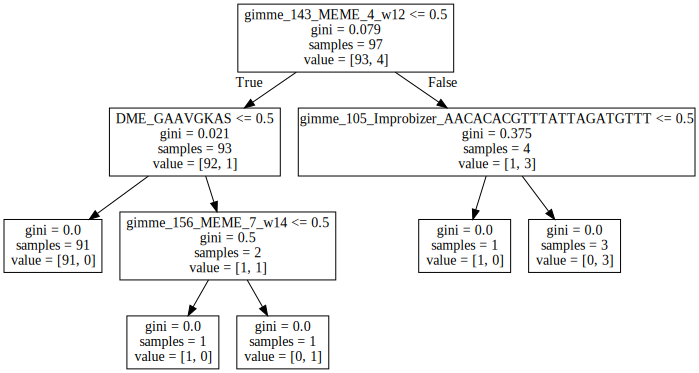

In [10]:
selectedPredictions = selectedTree.predict(x_test)
graph = Source( tree.export_graphviz(selectedTree, out_file=None, feature_names=selectedNames))
SVG(graph.pipe(format='svg'))

In [11]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=.001)
clf.fit(rawData, classes)
print(clf.coef_)

[ 0.          0.01633253  0.06283913 ...,  0.          0.          0.        ]
